In [12]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [29]:
iris = load_iris()
X = iris.data
y = iris.target

In [33]:
print(X.shape)

(150, 4)


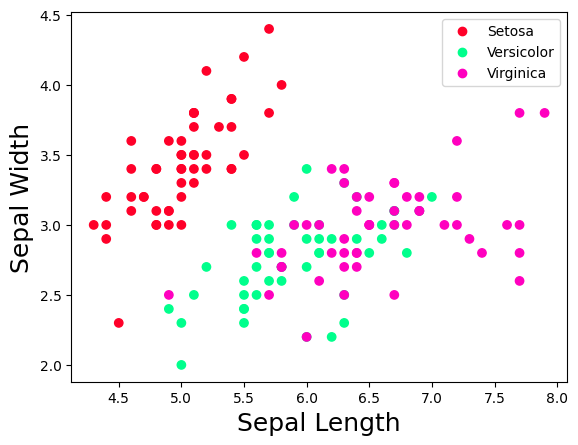

In [30]:
class_names = ['Setosa', 'Versicolor', 'Virginica']

# Scatter-Plot erstellen
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow')

# Achsentitel hinzufügen
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

# Legende hinzufügen
plt.legend(handles=scatter.legend_elements()[0], labels=['Setosa', 'Versicolor', 'Virginica'])

# Plot anzeigen
plt.show()



1. Der BFR-Algorithmus geht davon aus,dass wir bereits k=3 Cluster besitzen.
2. Nach der VL lesen wir Chunks von Daten ein, die wir in den Speicher laden, und dann den Algorithmus darauf anwenden.
3. Wir haben 3 Sets: Discard Set, Compression Set und Retained Set.
4. Für jeden Chunk berechnen wir für jeden Punkt die Distanz zu den Clustern aus, falls diese "nahe" genug sind, wird der Punkt dem Cluster und dem DS-set hinzugefügt. Update die Statistiken des Clusters (N, SUM, SUMSQ).
5. Cluster die verbliebenden Punkte, und die aus dem vorherigen Retained-Set mit K-means. Entstehende Cluster gehen in die Compression-Liste, outliers in die Retained-Liste.
6. Ggf. Merge Clusters aus der Compression-Liste, falls sie zu nah beieinander liegen. Ist dies die letzte Iteration, merge alle Cluster in CS und weise den verbleibenden Punkten aus RS einem Cluster zu.

Zu 4: Mit "Nahe" bestimmen wir die Mahalanobis-Distanz. Wir berechnen die Distanz zu jedem Cluster, und wählen den kleinsten Wert. Ist dieser kleiner als ein Schwellwert, wird der Punkt dem Cluster zugeordnet. Die Distanz wird wie folgt berechnet:

Cluster C hat centroid c (c_1,...,c_d) mit der Standartabweichung (sigma_1,..,sigma_d) mit d = anzahl Dimensionen. Punkt p = (x_1,...,x_d).
Die normalisierte Distanz ist für Dimension i ist dann:

y_i = $\frac{{x_i - c_i}}{{\sigma_i}}$

Die Mahalanobis-Distanz eines Punktes P zum Cluster C ist dann:

$\sqrt{\sum_{i=1}^{d} y_i^2}$

Wir fügen den Punkt dem Cluster hinzu, falls die Distanz kleiner als ein Schwellwert ist.

Zu 6: Wir berechnen die Varianz der potentiellen gemergten Cluster. Ist diese kleiner als ein Schwellwert, werden die Cluster gemerged. Die Varianz berechnet sich wie folgt aus N, SUM und SUMSQ: 


$(\frac{SUMSQ_i}{N}) - (\frac{SUM_I}{N})^2$

$\mathbf{Anmerkung:}$ Centroids werden berechnet mit SUM_i/N wobei SUM_i die Summe der Punkte in Dimension i ist.